# COVID-19 महामारीको अनुमान

## डाटा लोड गर्दै

हामी COVID-19 संक्रमित व्यक्तिहरूको डाटा प्रयोग गर्नेछौं, जुन [सिस्टम्स साइन्स एन्ड इन्जिनियरिङ केन्द्र](https://systems.jhu.edu/) (CSSE) ले [जन्स हप्किन्स विश्वविद्यालय](https://jhu.edu/) मा प्रदान गरेको छ। यो डाटासेट [यस GitHub रिपोजिटरी](https://github.com/CSSEGISandData/COVID-19) मा उपलब्ध छ।


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

हामीले `pd.read_csv` प्रयोग गरेर सबैभन्दा हालको डेटा सिधै GitHub बाट लोड गर्न सक्छौं। यदि कुनै कारणले डेटा उपलब्ध छैन भने, तपाईं सधैं `data` फोल्डरमा स्थानीय रूपमा उपलब्ध प्रतिलिपि प्रयोग गर्न सक्नुहुन्छ - केवल तलको `base_url` परिभाषित गर्ने लाइनलाई अनकमेन्ट गर्नुहोस्:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

हामी देख्न सक्छौं कि तालिकाको प्रत्येक पंक्तिले प्रत्येक देश र/वा प्रान्तका लागि संक्रमित व्यक्तिहरूको संख्या परिभाषित गर्दछ, र स्तम्भहरू मितिहरूसँग सम्बन्धित छन्। यस्तै तालिकाहरू अन्य डाटाका लागि पनि लोड गर्न सकिन्छ, जस्तै निको भएका व्यक्तिहरूको संख्या र मृत्युहरूको संख्या।


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## डाटाको अर्थ बुझ्दै

माथिको तालिकाबाट `Province/State` स्तम्भको भूमिका स्पष्ट छैन। अब `Province/State` स्तम्भमा रहेका विभिन्न मानहरू हेरौं:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## डाटालाई पूर्व-प्रक्रिया गर्ने 

हामी देशहरूलाई थप क्षेत्रहरूमा विभाजन गर्न इच्छुक छैनौं, त्यसैले हामी पहिलो चरणमा यो विभाजन हटाउनेछौं र सबै क्षेत्रहरूको जानकारीलाई एकसाथ थप्नेछौं, जसले गर्दा सम्पूर्ण देशको जानकारी प्राप्त गर्न सकिन्छ। यो `groupby` प्रयोग गरेर गर्न सकिन्छ:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

तपाईं देख्न सक्नुहुन्छ कि `groupby` प्रयोग गर्दा सबै DataFrames अब Country/Region द्वारा अनुक्रमित छन्। त्यसैले हामी `.loc` प्रयोग गरेर विशेष देशको डेटा पहुँच गर्न सक्छौं:


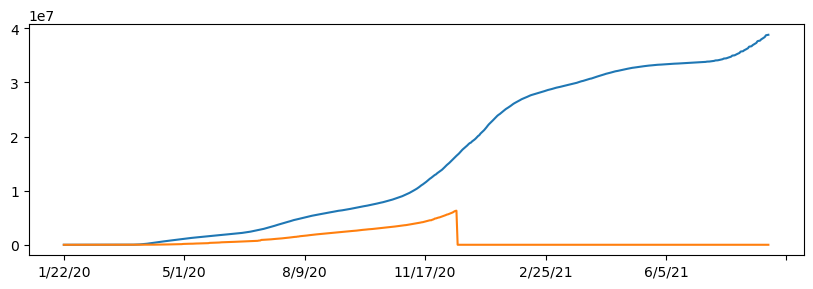

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **नोट** हामीले `[2:]` प्रयोग गरेर कसरी कुनै देशको भू-स्थान समावेश गर्ने अनुक्रमका पहिलो दुई तत्वहरू हटाउँछौं। हामी ती दुई स्तम्भहरू पूर्ण रूपमा हटाउन पनि सक्छौं:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## डाटाको अनुसन्धान गर्दै

अब कुनै विशेष देशको अनुसन्धानतर्फ लागौं। मिति अनुसार अनुक्रमणिका गरिएको संक्रमणसम्बन्धी डाटा समावेश गर्ने फ्रेम बनाऔं:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

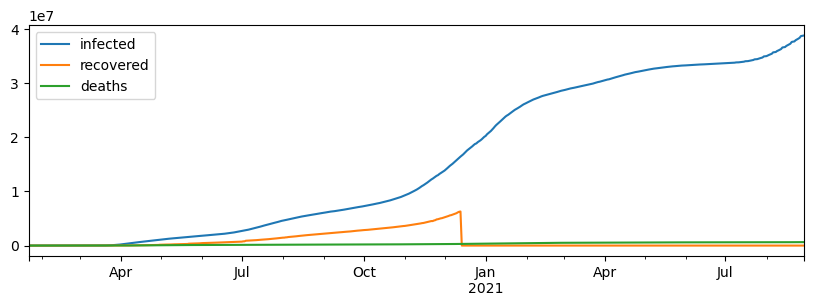

In [134]:
df.plot()
plt.show()

अब हरेक दिन नयाँ संक्रमित व्यक्तिहरूको संख्या गणना गरौं। यसले महामारीको प्रगति हुने गति देख्न मद्दत गर्नेछ। यो गर्नको लागि सबैभन्दा सजिलो तरिका `diff` प्रयोग गर्नु हो:


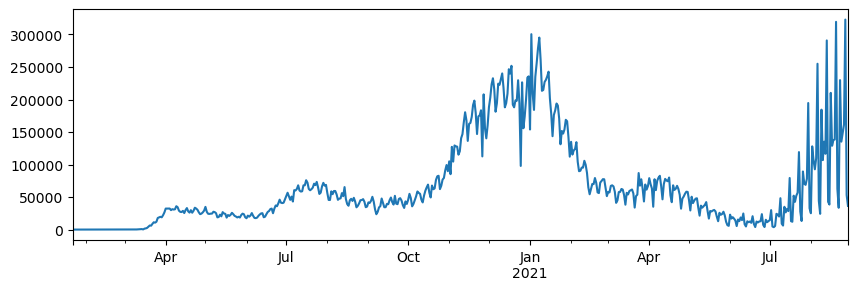

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

हामी डाटामा उच्च उतारचढाव देख्न सक्छौं। महिनाहरू मध्ये एकलाई नजिकबाट हेरौं:


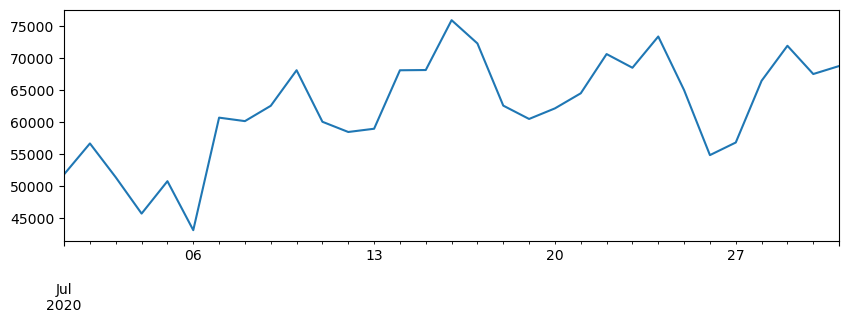

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

यो स्पष्ट देखिन्छ कि डाटामा साप्ताहिक उतारचढावहरू छन्। किनभने हामी प्रवृत्तिहरू देख्न सक्षम हुन चाहन्छौं, यसलाई चलिरहेको औसत गणना गरेर वक्रलाई समतल पार्नु उपयुक्त हुन्छ (अर्थात् प्रत्येक दिनको लागि हामी अघिल्ला केही दिनहरूको औसत मान गणना गर्नेछौं):


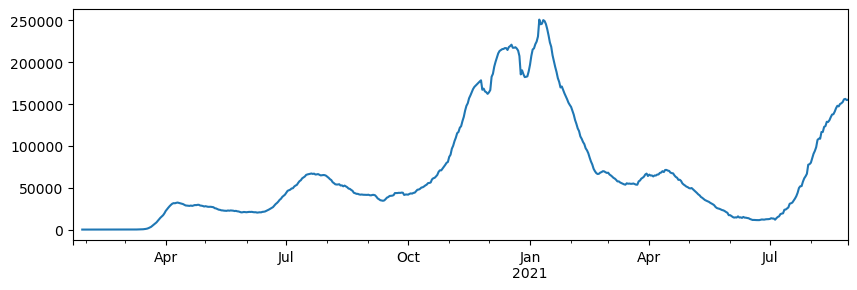

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

किनभने यो डाटासेटमा देशहरू र प्रान्तहरूको जानकारी समावेश छ, सम्पूर्ण देशको जनसंख्या प्राप्त गर्न हामीलाई अलि चतुर हुन आवश्यक छ:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

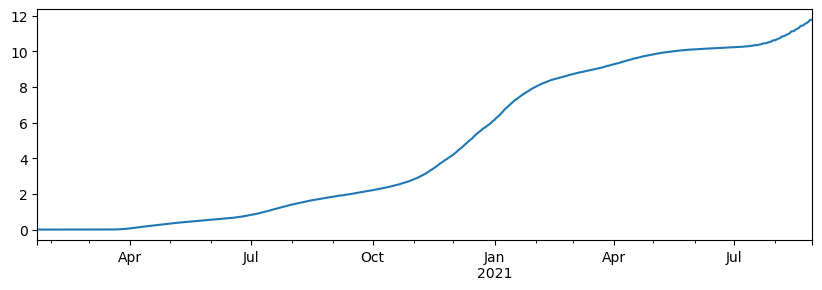

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## $R_t$ गणना गर्नुहोस्

रोग कति संक्रामक छ भनेर बुझ्नका लागि, हामी **मूल प्रजनन संख्या** $R_0$ हेर्छौं, जसले सङ्क्रमित व्यक्तिले थप कति व्यक्तिलाई सङ्क्रमित गर्न सक्छ भन्ने सङ्केत गर्दछ। जब $R_0$ १ भन्दा बढी हुन्छ, महामारी फैलने सम्भावना हुन्छ।

$R_0$ रोगको आफ्नै विशेषता हो, र यसले महामारीलाई सुस्त बनाउन मानिसहरूले अपनाउने केही सुरक्षात्मक उपायहरूलाई ध्यानमा राख्दैन। महामारीको प्रगतिमा, हामी कुनै पनि समय $t$ मा प्रजनन संख्या $R_t$ को अनुमान गर्न सक्छौं। देखाइएको छ कि यो संख्या करिब ८ दिनको झ्याल लिएर र गणना गरेर अनुमान गर्न सकिन्छ:  
$$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$  
जहाँ $I_t$ दिन $t$ मा नयाँ सङ्क्रमित व्यक्तिहरूको संख्या हो।

हामी हाम्रो महामारीको डाटाका लागि $R_t$ गणना गरौं। यो गर्नका लागि, हामी ८ वटा `ninfected` मानहरूको रोलिङ झ्याल लिनेछौं, र माथिको अनुपात गणना गर्न कार्य लागू गर्नेछौं:


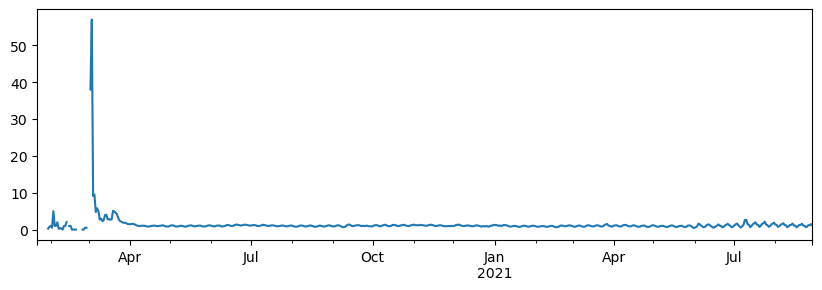

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

तपाईंले ग्राफमा केही खाली ठाउँहरू देख्न सक्नुहुन्छ। ती `NaN` वा `inf` मानहरू डेटासेटमा भएको कारणले हुन सक्छ। `inf` शून्यले भाग गर्दा उत्पन्न हुन सक्छ, र `NaN` ले हराएको डाटा वा परिणाम गणना गर्न उपलब्ध डाटा नभएको संकेत दिन सक्छ (जस्तै हाम्रो फ्रेमको सुरुवातमा, जहाँ ८ चौडाइको रोलिङ विन्डो अझै उपलब्ध छैन)। ग्राफलाई राम्रो देखाउनका लागि, हामीले ती मानहरू `replace` र `fillna` फंक्शन प्रयोग गरेर भर्नु आवश्यक छ।

अब महामारीको सुरुवाततिर अझै ध्यान दिऔं। हामी y-अक्षका मानहरूलाई ६ भन्दा तलका मानहरू मात्र देखाउन सीमित गर्नेछौं, जसले राम्रोसँग देख्न मद्दत गर्छ, र १ मा तेर्सो रेखा पनि कोर्नेछौं।


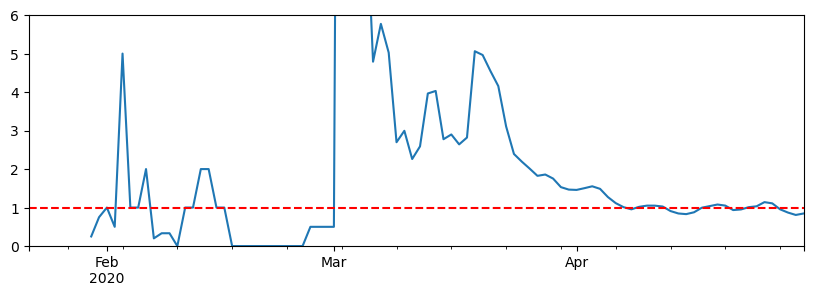

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

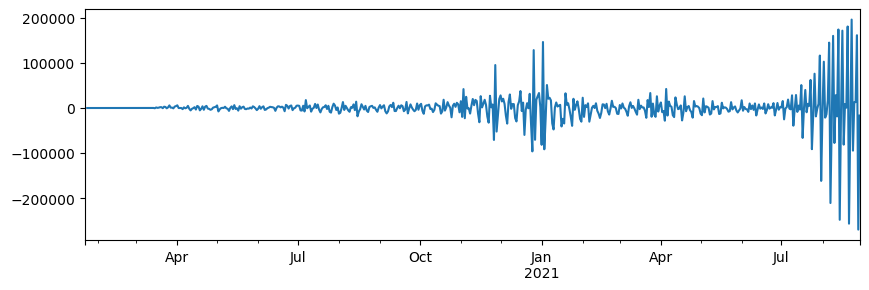

In [143]:
df['ninfected'].diff().plot()
plt.show()

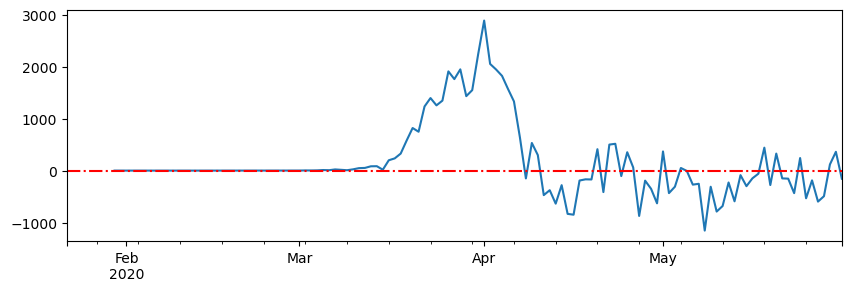

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## चुनौती

अब कोड र डाटासँग अझ बढी खेल्ने समय आएको छ! यहाँ केही सुझावहरू छन् जसमा तपाईंले प्रयोग गर्न सक्नुहुन्छ:
* विभिन्न देशहरूमा महामारीको फैलावट हेर्नुहोस्।
* धेरै देशहरूको $R_t$ ग्राफहरू एउटै प्लटमा तुलना गर्नका लागि प्लट गर्नुहोस्, वा साइड-बाइ-साइड धेरै प्लटहरू बनाउनुहोस्।
* मृत्यु र निको हुनेको संख्या संक्रमित केसहरूको संख्यासँग कसरी सम्बन्धित छ हेर्नुहोस्।
* संक्रमण दर र मृत्यु दरलाई दृश्यात्मक रूपमा तुलना गरेर र केही असमानताहरू खोजेर सामान्यतया रोग कति समयसम्म रहन्छ पत्ता लगाउने प्रयास गर्नुहोस्। यो पत्ता लगाउन तपाईंले विभिन्न देशहरू हेर्न आवश्यक पर्न सक्छ।
* मृत्यु दर गणना गर्नुहोस् र यो समयसँगै कसरी परिवर्तन हुन्छ हेर्नुहोस्। गणना गर्नु अघि समय श्रृंखलालाई सर्नका लागि तपाईंले रोगको दिनहरूको लम्बाइलाई ध्यानमा राख्न चाहनुहुन्छ।


## सन्दर्भहरू

तपाईंले COVID महामारीको फैलावटसम्बन्धी थप अध्ययन निम्न प्रकाशनहरूमा हेर्न सक्नुहुन्छ:
* [COVID महामारीको समयमा Rt अनुमानका लागि स्लाइडिङ SIR मोडेल](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), [दिमित्री सोष्निकोभ](http://soshnikov.com) द्वारा ब्लग पोस्ट
* T.Petrova, D.Soshnikov, A.Grunin. [ग्लोबल COVID-19 प्रकोपका लागि समय-निर्भर पुनरुत्पादन सङ्ख्या अनुमान](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [GitHub मा माथिको पेपरको लागि कोड](https://github.com/shwars/SlidingSIR)



---

**अस्वीकरण**:  
यो दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) प्रयोग गरी अनुवाद गरिएको हो। हामी यथासम्भव सटीकता सुनिश्चित गर्न प्रयास गर्छौं, तर कृपया ध्यान दिनुहोस् कि स्वचालित अनुवादहरूमा त्रुटि वा अशुद्धता हुन सक्छ। यसको मूल भाषामा रहेको मूल दस्तावेज़लाई आधिकारिक स्रोत मानिनुपर्छ। महत्त्वपूर्ण जानकारीका लागि, व्यावसायिक मानव अनुवाद सिफारिस गरिन्छ। यस अनुवादको प्रयोगबाट उत्पन्न हुने कुनै पनि गलतफहमी वा गलत व्याख्याका लागि हामी जिम्मेवार हुने छैनौं।
